<a href="https://colab.research.google.com/github/Aishi0408/Implement-KNN-classifier-to-predict-thyroid-disease-/blob/main/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Assuming df is your dataframe with features and target
df = pd.read_csv('/content/drive/MyDrive/quiz/Thyroid_Diff.csv')
df.head(2)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


#Data Preprocessing

In [ ]:
#Missing values
df.isnull().sum()


Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

<Axes: xlabel='Risk'>

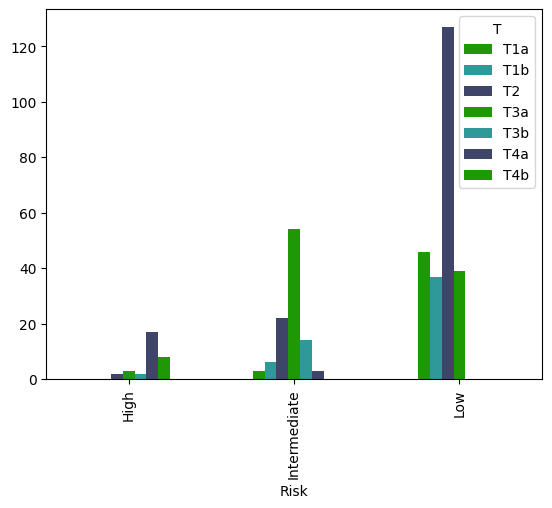

In [ ]:
from IPython.display import display, HTML
code = """
<pre><code><b>Risk According to Tumor_Size:</b></code></pre>
"""
display(HTML(code))
import matplotlib.pyplot as plt
df.groupby('Risk')['T'].value_counts().unstack().plot(kind='bar',color=['#1f9805','#2f9899','#3f4568'])

In [ ]:
#Data Encoding
data_obj = df.select_dtypes(['object']).columns

In [ ]:
data_obj

Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label=LabelEncoder()
df['Gender'] = label.fit_transform(df['Gender'])
df['Smoking'] = label.fit_transform(df['Smoking'])
df['Hx Smoking']= label.fit_transform(df['Hx Smoking'])
df['Hx Radiothreapy']= label.fit_transform(df['Hx Radiothreapy'])
df['Thyroid Function']= label.fit_transform(df['Thyroid Function'])
df['Physical Examination'] = label.fit_transform(df['Physical Examination'])
df['Adenopathy']= label.fit_transform(df['Adenopathy'])
df['Pathology']= label.fit_transform(df['Pathology'])
df['Focality']= label.fit_transform(df['Focality'])
df['Risk'] = label.fit_transform(df['Risk'])
df['T'] = label.fit_transform(df['T'])
df['N']= label.fit_transform(df['N'])
df['M']= label.fit_transform(df['M'])
df['Stage']= label.fit_transform(df['Stage'])
df['Response']= label.fit_transform(df['Response'])
df['Recurred']= label.fit_transform(df['Recurred'])

#Checking for outliers

In [ ]:
for col in df:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # calculate IQR for each column
    IQR = Q3 - Q1

    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    outliers = df[(df[col] > upper) & (df[col] < lower)]

print(f"Outliers information: \n{outliers.sum()}")

Outliers information: 
Age                     0.0
Gender                  0.0
Smoking                 0.0
Hx Smoking              0.0
Hx Radiothreapy         0.0
Thyroid Function        0.0
Physical Examination    0.0
Adenopathy              0.0
Pathology               0.0
Focality                0.0
Risk                    0.0
T                       0.0
N                       0.0
M                       0.0
Stage                   0.0
Response                0.0
Recurred                0.0
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# min max normalization
data = df.iloc[:, :-1]
min_max=MinMaxScaler()
scaled_min_max = min_max.fit_transform(data)
normalized_data = pd.DataFrame(scaled_min_max)
normalized_data[:2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.179104,0.0,0.0,0.0,0.0,0.75,0.75,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.666667
1,0.283582,0.0,0.0,1.0,0.0,0.25,0.25,0.6,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,0.333333


In [ ]:
X = normalized_data
y = df['Recurred']

In [ ]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Finding the best accuracy



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=9)

# Fit the model
knn.fit(X_train, y_train)

# Predict the labels for test set
y_pred = knn.predict(X_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9090909090909091


#Evaluation of model performance

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
precision= precision_score(y_test,y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Classification Report:\n", report)

Accuracy:  0.9090909090909091
Precision:  1.0
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        58
           1       1.00      0.63      0.77        19

    accuracy                           0.91        77
   macro avg       0.95      0.82      0.86        77
weighted avg       0.92      0.91      0.90        77



#The plotting of ROC Curve

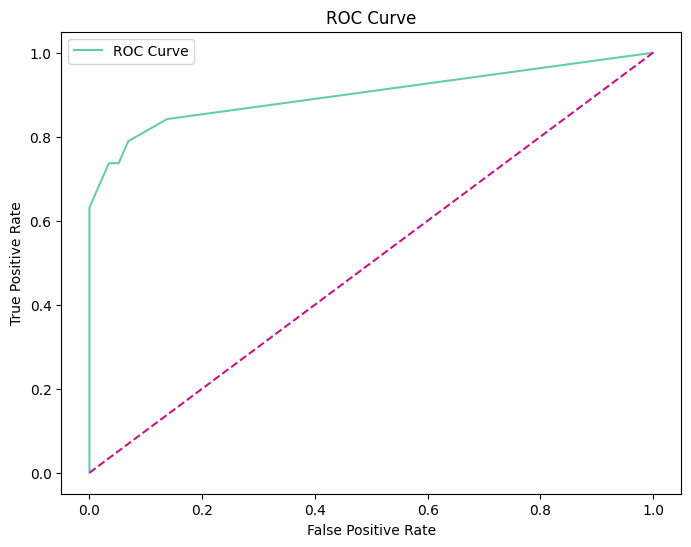

ROC AUC Score: 0.90


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# Getting predicted probabilities
y_proba = knn.predict_proba(X_test)[:, 1]

# Calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='mediumaquamarine', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='mediumvioletred', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Calculating ROC AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')
